Results from demographic + experience smartwatch survey
====

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
"""
Read in the questionnaire data

"""
import pandas as pd

# Need to mount the SEACO RDSF drive here
path = "/mnt/z/SEACO data/SEACO-CH20 qnaire data/SEACO_CH20_17082022_de_id.csv"
qnaire_data = pd.read_csv(path)

qnaire_data.head()

/tmp/ipykernel_9041/3104238101.py:9: DtypeWarning: Columns (17,25,26,52,197,198,200,201,209,210,212,213,216,218,219,222,225,227,228,230,231,233,234,236,237,239,240,243,246,248,249,252,254,255,257,258,261,263,264,267,269,270,272,273,276,279,281,284,291,293,294,296,297,300,302,303,305,306,309,311,312,314,315,317,318,321,324,327,330,344,351,352,354,355,360,361,362,363,364,369,370,371,372,373,378,379,380,381,382,387,390,391,396,397,398,399,400,406,407,415,425,432,434,435,436,446,456,486,499,504,506,512,513,549) have mixed types. Specify dtype option on import or set low_memory=False.
  qnaire_data = pd.read_csv(path)


,deviceid,updatelistselected,barcodehouse,residents_id,respondent_status,verify_note,verify_address,address_barcode,respondent_sex,respondent_ethnicity,...,field_note,formdef_version,key,review_quality,review_corrections,submissiondate,starttime,endtime,dob,bp_start
0,1111dda705a8df02,2104,JBI000024,2104,1,NaN,1.0,1.0,1.0,1.0,...,Done blood,2.112000e+09,uuid:9c4dfbbd-efd6-4dfa-bd94-35e1e64a7f45,OKAY,"nurul.syazwana@monash.edu (Mar 11, 2022 4:21:3...",19jan2022 09:17:38,18jan2022 21:44:56,19jan2022 08:59:50,13mar2007,18jan2022
1,1833a79c47db6bdc,2864,GMH000071,2864,1,NaN,1.0,1.0,1.0,1.0,...,NaN,2.112000e+09,uuid:cd20720f-3c19-48f9-bc27-76f749e257c9,OKAY,NaN,26jan2022 12:01:19,21jan2022 16:22:03,24jan2022 11:32:27,11jul2013,24jan2022
2,1833a79c47db6bdc,15697,GMH000980,15697,1,NaN,1.0,1.0,1.0,1.0,...,NaN,2.112000e+09,uuid:39a85c45-a319-45e7-bbab-ff683d328ef9,GOOD,NaN,26jan2022 12:01:19,24jan2022 11:37:03,24jan2022 12:01:56,10mar2008,24jan2022
3,1833a79c47db6bdc,1382,JBI000014,1382,1,NaN,1.0,1.0,1.0,1.0,...,NaN,2.112000e+09,uuid:3471f3f6-fe16-4d76-b747-210b12d2266a,GOOD,NaN,26jan2022 12:01:20,24jan2022 12:12:45,26jan2022 11:35:36,13jan2013,26jan2022
4,1833a79c47db6bdc,3632,JBI000329,3632,1,NaN,1.0,1.0,2.0,1.0,...,NaN,2.112000e+09,uuid:42cc75b5-cd1e-4099-b8a7-f92963922c56,OKAY,NaN,28jan2022 11:20:00,06jan2022 22:38:14,26jan2022 13:44:00,29mar2013,07jan2022


In [3]:
"""
Choose only respondents who agreed to take part

"""
accepted_df = qnaire_data[qnaire_data["respondent_status"] == 1].copy()
len(accepted_df)

626

In [4]:
"""
Add a column for age group

"""
import numpy as np

lims = (7, 9, 18)
accepted_df["child"] = (accepted_df["age_dob"] >= lims[0]) & (
    accepted_df["age_dob"] <= lims[1]
)
accepted_df["adolescent"] = (accepted_df["age_dob"] > lims[1]) & (
    accepted_df["age_dob"] <= lims[2]
)

# Check no overlap
assert not (accepted_df["child"] & accepted_df["adolescent"]).any()

# Check no unassigned
assert (accepted_df["child"] | accepted_df["adolescent"]).all()

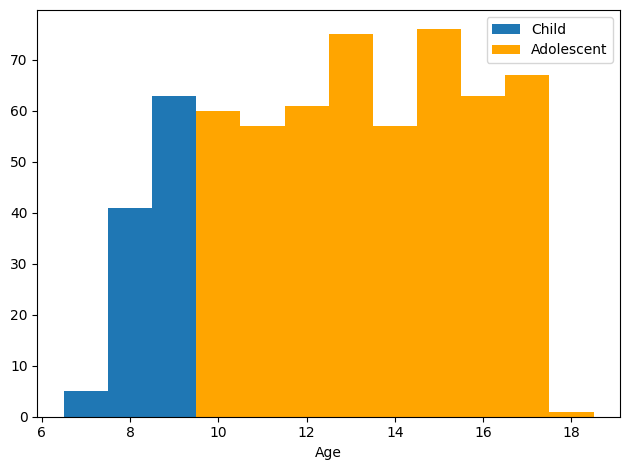

In [5]:
""" Histogram of ages """

import matplotlib.pyplot as plt

fig, axis = plt.subplots()

bins = np.linspace(6.5, 18.5, 13)
accepted_df[accepted_df["child"]]["age_dob"].hist(ax=axis, bins=bins, label="Child")
accepted_df[accepted_df["adolescent"]]["age_dob"].hist(ax=axis, bins=bins, label="Adolescent", color="orange")

axis.grid(False)
axis.legend()
axis.set_xlabel("Age")

fig.tight_layout()

In [6]:
"""
Find the number of each who agreed to take part in the smartwatch study

"""

# We only care about the participants who were asked about the smartwatches
child_df = accepted_df[accepted_df["child"] & ~pd.isna(accepted_df["smart1_7to9"])]
adolescent_df = accepted_df[
    accepted_df["adolescent"] & ~pd.isna(accepted_df["smart1_10to17"])
]

child_df["smart1_7to9"].value_counts(dropna=False), adolescent_df["smart1_10to17"].value_counts(dropna=False)

(smart1_7to9
 1.0    4
 2.0    1
 Name: count, dtype: int64,
 smart1_10to17
 1.0    79
 2.0     3
 Name: count, dtype: int64)

In [7]:
"""
For the participants who didn't take part, find out why

"""

print(child_df[child_df["smart1_7to9"] == 2]["smart2_7to9"].value_counts(dropna=False))

# Here, 7 means "Other"
print(
    child_df[(child_df["smart1_7to9"] == 2) & (child_df["smart2_7to9"] == 7)][
        "smart2a_7to9"
    ]
)

smart2_7to9
7.0    1
Name: count, dtype: int64
41   -99.0
Name: smart2a_7to9, dtype: float64


In [8]:
print(
    adolescent_df[adolescent_df["smart1_10to17"] == 2]["smart2_10to17"].value_counts(
        dropna=False
    )
)

# Here, 7 means "Other" and -9 means "Refused to answer"
print(
    adolescent_df[
        (adolescent_df["smart1_10to17"] == 2) & (adolescent_df["smart2_10to17"] == 7)
    ]["smart2a_10to17"]
)

smart2_10to17
-9.0    1
 7.0    1
 NaN    1
Name: count, dtype: int64
94    takut bawa ke sekolah
Name: smart2a_10to17, dtype: object


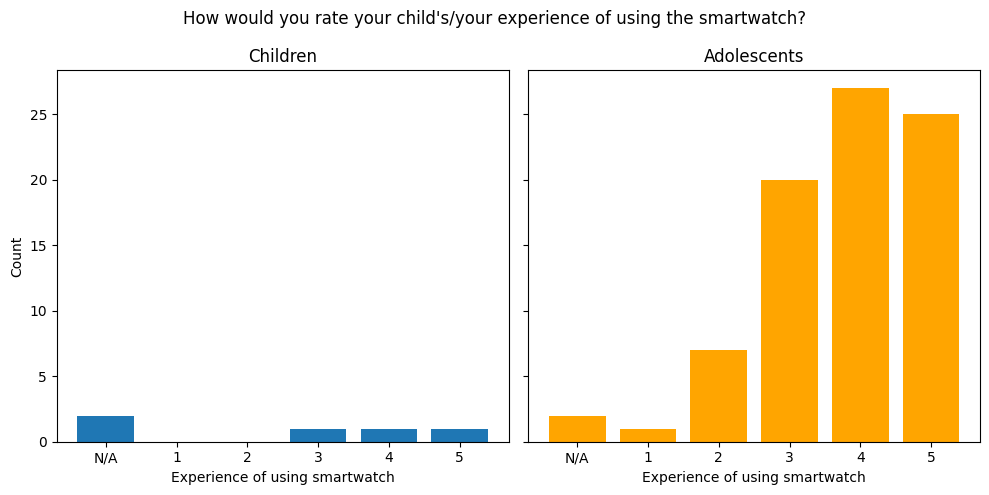

In [15]:
"""
Make a bar chart of experience of using the smartwatch

"""

child_counts = child_df["smart3_7to9"].value_counts(dropna=False)
adolescent_counts = adolescent_df["smart3_10to17"].value_counts(dropna=False)

# Replace the NaN in the index with 0
child_counts.index = child_counts.index.fillna(0)
adolescent_counts.index = adolescent_counts.index.fillna(0)

fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

axes[0].bar(child_counts.index, child_counts.values)
axes[1].bar(adolescent_counts.index, adolescent_counts.values, color="orange")

# Label each bar with the number


for axis in axes:
    axis.set_xlabel("Experience of using smartwatch")
    axis.set_xticks(range(6), ["N/A", *range(1, 6)])

axes[0].set_title("Children")
axes[0].set_ylabel("Count")
axes[1].set_title("Adolescents")

fig.suptitle("How would you rate your child's/your experience of using the smartwatch?")
fig.tight_layout()